In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

sns.set()

In [26]:
# After we imported our needed packages, we import our dataframe and name it "df_poly"
df_poly = pd.read_csv('boston_polynomial.csv')
df_poly.head()

,price,LSTAT
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
4,36.2,5.33


In [61]:
df_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
 1   LSTAT   506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


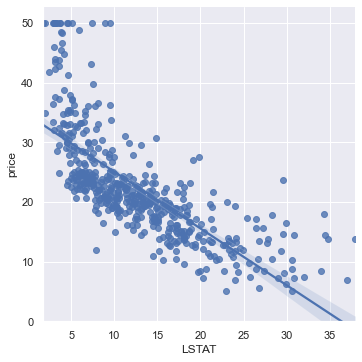

In [62]:
#We are defining our variables and creating a scatter plot for price vs. LSTAT
x=np.array(df_poly['LSTAT'])
y= np.array(df_poly['price'])

g= sns.lmplot(x='LSTAT', y='price', data=df_poly)
g.set(ylim=(0, None))
plt.show()

In [63]:
#Fit and Transform our Data
poly = PolynomialFeatures(degree =5)
x_poly = pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))

In [30]:
x_poly.head()

,0,1,2,3,4,5
0,1.0,4.98,24.8004,123.505992,615.059840,3062.998004
1,1.0,9.14,83.5396,763.551944,6978.864768,63786.823981
2,1.0,4.03,16.2409,65.450827,263.766833,1062.980336
3,1.0,2.94,8.6436,25.412184,74.711821,219.652754
4,1.0,5.33,28.4089,151.419437,807.065599,4301.659644


In [31]:
#After that is all cleaned up, we get to test and train our data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=1000)

In [32]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
y_hat_test = model.predict(x_test)

In [34]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_test, 'resid': y_test - y_hat_test})
df_predictions.head()

,y_test,y_hat_test,resid
0,21.8,21.514132,0.285868
1,10.2,18.150191,-7.950191
2,15.2,16.197956,-0.997956
3,43.5,40.765901,2.734099
4,50.0,22.373052,27.626948


In [35]:
#Test our RMSE (root mean-squared error)

y_train_predicted= model.predict(x_train)
y_test_predicted= model.predict(x_test)

In [36]:
MSE_test =round(np.mean(np.square(y_test - y_test_predicted)),2)
RMSE_test = round(np.sqrt(MSE_test),4)
print("RMSE_test =",RMSE_test)

RMSE_test = 5.2038


In [37]:
#Here we test our K-Fold using cross-validation
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [38]:
model = LinearRegression()
x_train.head()

,0,1,2,3,4,5
266,1.0,14.79,218.7441,3235.225239,47848.981285,707686.433202
363,1.0,14.64,214.3296,3137.785344,45937.177436,672520.277665
78,1.0,12.34,152.2756,1879.080904,23187.858355,286138.172105
180,1.0,7.56,57.1536,432.081216,3266.533993,24694.996987
229,1.0,3.76,14.1376,53.157376,199.871734,751.517719


In [54]:
NMSE = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )
NMSE

array([-29.86719094, -33.52802201, -25.80781842, -13.73286278,
       -27.93646057, -20.84327435, -27.50171331, -35.69608462,
       -21.85124937, -43.54739387])

In [55]:
NMSE = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
RMSE_CV5 = round(np.sqrt(-NMSE).mean(),4)

RMSE_CV5

5.262

In [72]:
#Pedram's code from part 7 of class
def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=100):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),7)


  
#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))
    
    return poly_degree, RMSE_train, RMSE_test

In [73]:
my_polynomial_regression(poly_degree=i,X=x,y=y)

(9, 4.69, 6.1497967)

In [76]:
#We create the table from aboe to plot the RMSE test and RMSE train against the degree on the horizontal axis 
returns= []
for i in range(1,10):
    returns.append(my_polynomial_regression(poly_degree=i, X=x,y=y))
    
output = pd.DataFrame(returns, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,5.92,6.883313
1,2,5.13,6.317436
2,3,4.95,6.264184
3,4,4.82,6.164414
4,5,4.72,6.149797
5,6,4.70,6.166036
6,7,4.69,6.173330
7,8,4.69,6.162792
8,9,4.69,6.149797


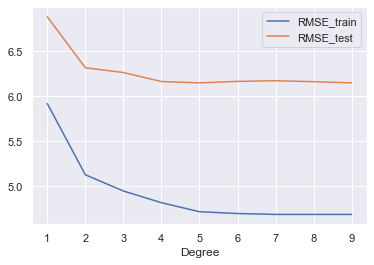

In [77]:
output.set_index('Degree').plot()
plt.show()

In [78]:
# Based on the elbow method, the degree that we shoud be using is 2. Any point farther than 2 will be overfitting and not as effective. 
#From our table above, we can see that the RMSE_test is minimized at the degree number 5.